## Insuranace Cost Prediction with Kaggle's dataset

The Dataset has following features :
 
    - age: age of primary Beneficiary.

    - sex: insurance contractor gender, female, male.

    - bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
           objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    - children: Number of children covered by health insurance / Number of dependents

    - smoker: Benificiary Smokes or not. 

    - region: The Beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    - charges: Individual medical costs billed by health insurance.

The aim is to predict Medical costs of the Beneifciary billed under Health Insurance.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [12]:
# Importing Dataset
data = pd.read_csv('./Datasets/insurance.csv')

In [13]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
# Transforming Categorical columns

map = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}

pd.set_option('future.no_silent_downcasting', True)
df_copy = data.copy()
df_copy.replace(map , inplace=True)
df_copy = df_copy.infer_objects(copy=False)

sex        -0.057292
region      0.011741
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64


<Axes: >

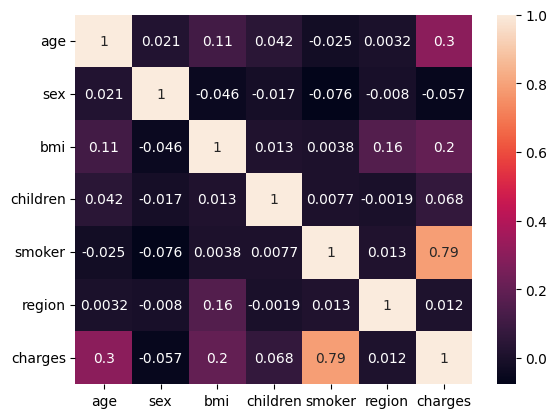

In [15]:
# determing the correlation of other columns with the traget

print(df_copy.corr()['charges'].sort_values())
sns.heatmap(data=df_copy.corr() , annot=True)

- Continuing with making a Elastic Net Model

In [16]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler , PolynomialFeatures

# defining features and labels
poly = PolynomialFeatures(degree=2 , include_bias=False)
X = poly.fit_transform(df_copy.drop('charges' , axis=1))
y = df_copy['charges']

# creating train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scaling data
scaler = StandardScaler()
scaled_X_train= scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Defining the model 
Model = ElasticNet(max_iter=100000) # Due to convergence issue the max_iter is set so high

params_grid = {
    'alpha':[x for x in range(1 ,  31)],
    'l1_ratio':[0.1, 0.2 , 0.3 , 0.4 , 0.5 , 0.6, 0.9, 1.0]
}

grid_search_model = GridSearchCV(estimator=Model , param_grid=params_grid , scoring='neg_root_mean_squared_error' , cv=125)
grid_search_model.fit(scaled_X_train , y_train)

# Best parameters for Elastic Net
print(grid_search_model.best_params_)

{'alpha': 19, 'l1_ratio': 1.0}


- Testing model with Test set

In [17]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

y_pred = grid_search_model.predict(scaled_X_test)
print(" Mean Abosulte Error :" , mean_absolute_error(y_test , y_pred))
print("Root Mean Squared Error : " , np.sqrt(mean_squared_error(y_test , y_pred))) 

 Mean Abosulte Error : 2699.563126865999
Root Mean Squared Error :  4486.406849703483


- Trying KNN_Regressor Model

In [19]:
from sklearn.neighbors import KNeighborsRegressor

params_grid_2 = {
    'n_neighbors': [x for x in range(1 , 30)],
}

grid_search_model_2 = GridSearchCV(estimator=KNeighborsRegressor() , param_grid=params_grid_2 , scoring='neg_root_mean_squared_error')
grid_search_model_2.fit(scaled_X_train , y_train)

# Best parameters for KNN Regressor
print(grid_search_model_2.best_params_)

{'n_neighbors': 10}


- Testing for KNN Regressor

In [21]:
y_pred = grid_search_model_2.predict(scaled_X_test)
print(" Mean Abosulte Error :" , mean_absolute_error(y_test , y_pred))
print("Root Mean Squared Error : " , np.sqrt(mean_squared_error(y_test , y_pred))) 

 Mean Abosulte Error : 3275.5711071218907
Root Mean Squared Error :  5190.011290238967


- Trying with Support Vector Regressor

In [27]:
from sklearn.svm import SVR

params_grid = {
    'kernel':['linear' , 'rbf' , 'poly'],
    'gamma':[0.001 , 0.1 , 0.2 , 0.3 , 0.4 , 0.5],
    'C':[0.1 , 0.2 , 0.3 , 0.4 , 0.5],
    'epsilon':[0.1 , 0.2 , 0.3 , 0.4 , 0.5], 
    'degree' : [x for x in range(1 ,5)] ,
}

GridSearch_SVR = GridSearchCV(estimator=SVR() , param_grid=params_grid , scoring='neg_root_mean_squared_error')
GridSearch_SVR.fit(scaled_X_train , y_train)

# Best parameters for SVR
print(GridSearch_SVR.best_params_)

{'C': 0.5, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.5, 'kernel': 'poly'}


- Testing with Support Vector Regressor

In [28]:
y_pred = GridSearch_SVR.predict(scaled_X_test)
print(" Mean Abosulte Error :" , mean_absolute_error(y_test , y_pred))
print("Root Mean Squared Error : " , np.sqrt(mean_squared_error(y_test , y_pred)))

 Mean Abosulte Error : 2353.851377760096
Root Mean Squared Error :  5031.290409752655


- Support Vector Regressor Model with an absolute error of 2353$ on each price prediction is the best for now...